In [2]:
# Identity Transformation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [19]:
img_path = r"a1images\brain_proton_density_slice.png"
f = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

x = np.arange(256, dtype=np.float32)

# White matter tends to be darker; gray matter brighter (on PD).
mu_wm, sigma_wm = 150, 20
t_wm = 255.0 * np.exp(-((x - mu_wm)**2) / (2 * sigma_wm**2))   # WM emphasis
t_wm = np.clip(t_wm, 0, 255).astype(np.uint8)

mu_gm, sigma_gm = 200, 18
t_gm = 255.0 * np.exp(-((x - mu_gm)**2) / (2 * sigma_gm**2))   # GM emphasis
t_gm = np.clip(t_gm, 0, 255).astype(np.uint8)

#apply LUTs
wm_img = t_wm[f]
gm_img = t_gm[f]



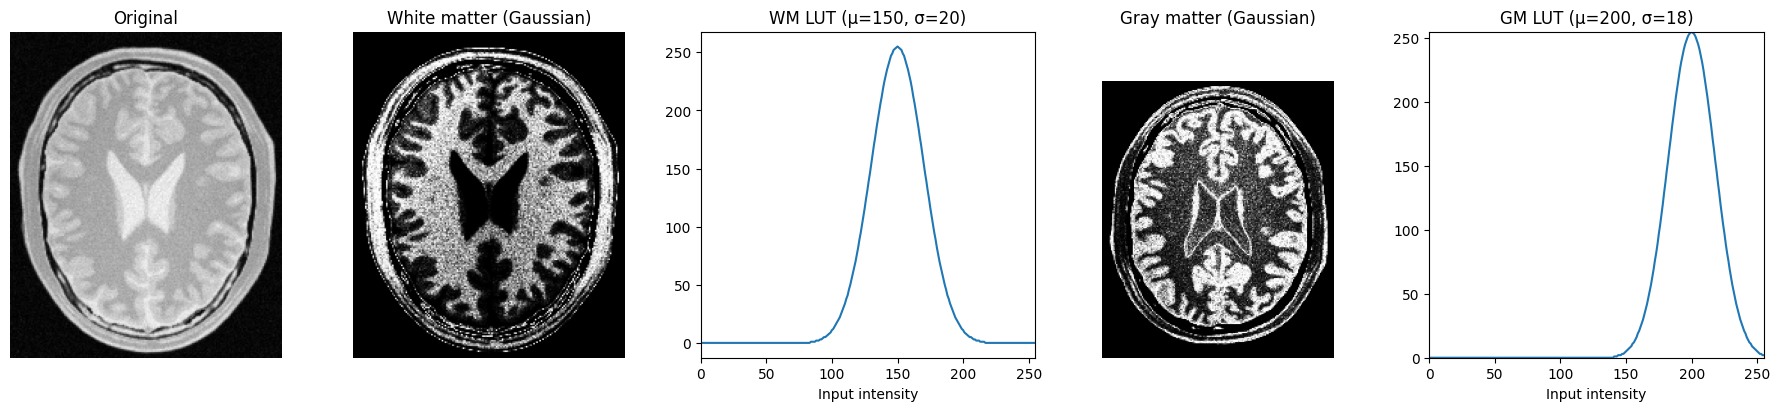

In [20]:
# Plot original + two outputs + two Gaussian curves side-by-side
fig, ax = plt.subplots(1, 5, figsize=(18, 4), constrained_layout=True)

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(wm_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('White matter (Gaussian)')
ax[1].axis('off')

ax[2].plot(x, t_wm)
ax[2].set_xlim(0, 255); ax[3].set_ylim(0, 255)
ax[2].set_title(f'WM LUT (μ={mu_wm}, σ={sigma_wm})')
ax[2].set_xlabel('Input intensity'); ax[3].set_ylabel('Output intensity')

ax[3].imshow(gm_img, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Gray matter (Gaussian)')
ax[3].axis('off')

ax[4].plot(x, t_gm)
ax[4].set_xlim(0, 255); ax[4].set_ylim(0, 255)
ax[4].set_title(f'GM LUT (μ={mu_gm}, σ={sigma_gm})')
ax[4].set_xlabel('Input intensity')

plt.show()
